In [1]:
#import all the necessary modules
import os

from fastai.vision.all import *
from fastai.vision import *

import pandas as pd

In [2]:
#define a function create_labels_csv_file to create csv files with namme and label from dataset folder
def create_labels_csv_file(dataset_path: str) -> None:
    class_names = [] #to store all folders in the dataset path
    for folder_name in os.listdir(dataset_path):
        class_names.append(folder_name)

    image_paths = [] #initialize a images_path list
    labels = [] #initialize a labels list

    #retrieve the list of image names  and append image_paths
    for i in range(len(class_names)):
        class_name = class_names[i]
        if '.csv' in os.path.basename(class_name):
            continue
        image_names = os.listdir(
            os.path.join(
                dataset_path,
                class_name
            )
        )
        for image_name in image_names:
            image_path = os.path.join(
                dataset_path,
                class_name,
                image_name
            )
            image_paths.append(image_path)
            labels.append(i)
    #create a dataframe
    df = pd.DataFrame(
        {
            'name': image_paths,
            'label': labels
        }
    )
    #save the dataframes as csv file
    df.to_csv(
        path_or_buf=os.path.join(
            dataset_path,
            'labels.csv'
        ),
        index=False
    )

In [21]:
#create labels.csv for train folder
create_labels_csv_file(
    dataset_path=os.path.join(
        'data',
        'train'
    )
)
#create labels.csv for valid folder
create_labels_csv_file(
    dataset_path=os.path.join(
        'data',
        'valid'
    )
)

In [24]:
#load the data for data preprocessing and augmentation
dls = ImageDataLoaders.from_folder(
    path='data',
    train='train',
    valid='valid',
    item_tfms=Resize(224),#resize all the images
    bs=16,#set batch size
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()]#normalize and aplly various transformations to each set
)

c:\Users\Chaitali\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


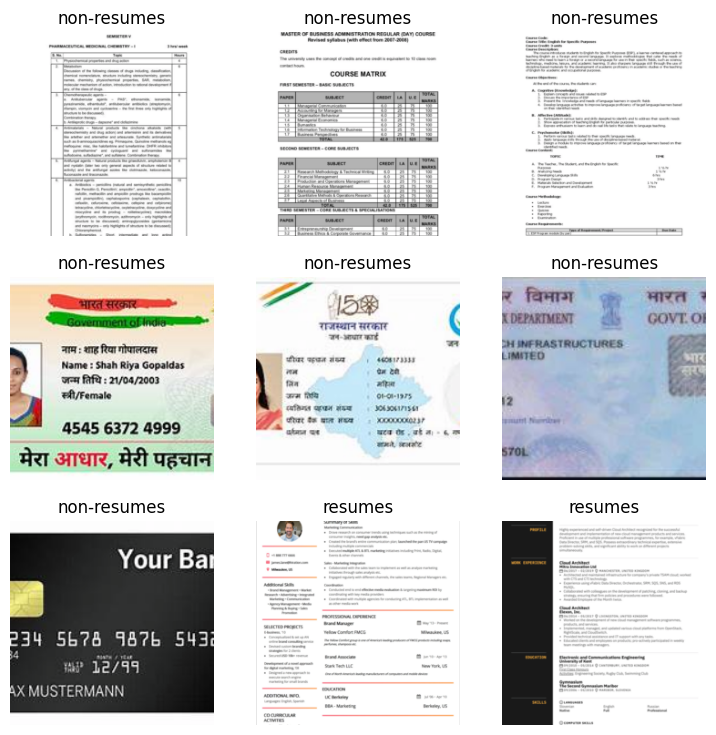

In [25]:
dls.valid.show_batch() #display current batch from dls.valid dataloader

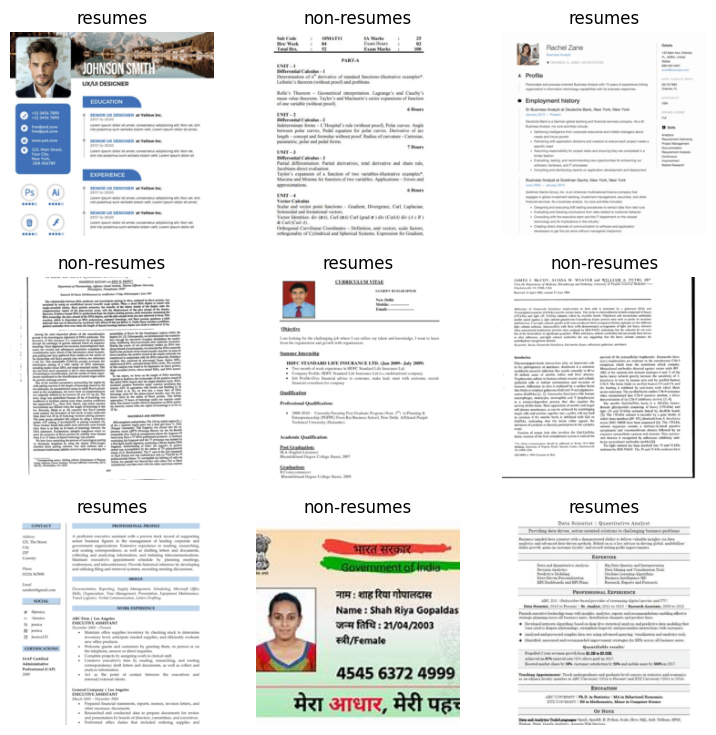

In [26]:
dls.train.show_batch()#display current batch from dls.train dataloader

In [27]:
#create a model  using vision_learner function
model = vision_learner(
    dls=dls, 
    arch=models.resnet50, # ResNet50 is a NN architechture for image recognition
    metrics=[accuracy, error_rate]#specify metric to evaluate performance
)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\Chaitali/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [02:00<00:00, 852kB/s] 


In [29]:
#train the model created using our dataset
model.fine_tune(
    epochs=15
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.626173,0.605103,0.705882,0.294118,00:11


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.146450,0.528026,0.647059,0.352941,00:14
1,0.206787,0.329154,0.882353,0.117647,00:13
2,0.242398,0.277923,0.882353,0.117647,00:14
3,0.258174,0.282829,0.882353,0.117647,00:13
4,0.244701,0.189353,0.882353,0.117647,00:13
5,0.239689,0.120512,0.941176,0.058824,00:14
6,0.222799,0.072876,1.000000,0.000000,00:14
7,0.230434,0.058312,0.941176,0.058824,00:14
8,0.220527,0.049668,1.000000,0.000000,00:16
9,0.209586,0.132961,0.941176,0.058824,00:17


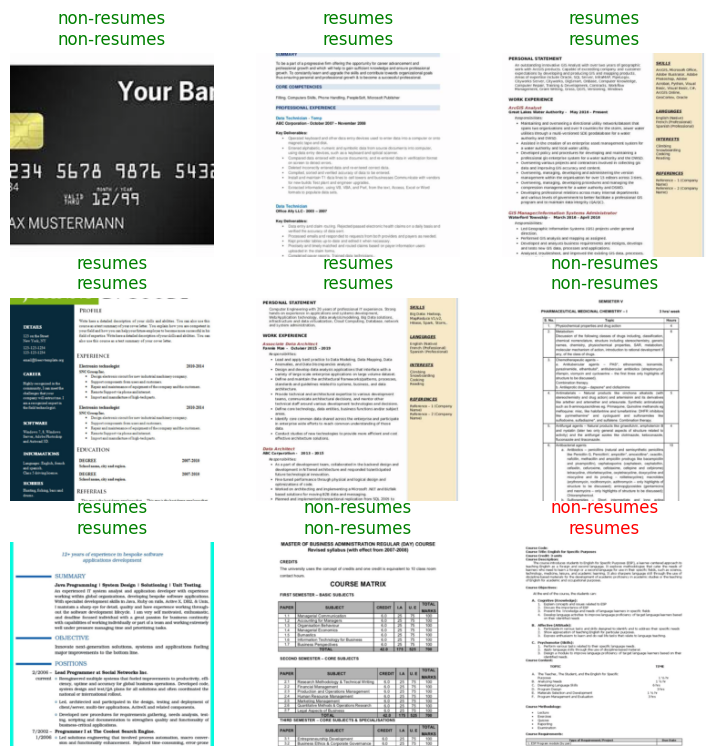

In [30]:
#display the results of the trained model
model.show_results()

In [31]:
model.validate() #validate and debug model

(#3) [0.33509135246276855,0.9411764740943909,0.05882352963089943]

In [32]:
model.export('resume_classifier.pkl')#save the model

In [34]:
new_model = load_learner('data/resume_classifier.pkl')#load the model and save in new_model variable for using

In [35]:
#predict using a new image
new_model.predict(
    item='C:/Users/Chaitali/OneDrive/Desktop/my_portfolio/data/test/resumes/a14.jpg'
)

c:\Users\Chaitali\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


('resumes', tensor(1), tensor([4.7865e-04, 9.9952e-01]))